**Summary of the experiment:** The experiments covers importing necessary libraries, reading the dataset, exploring data with the profile report, cleaning salary data, splitting columns, creating visualizations like word clouds and bar charts, and analyzing skill distributions for different job titles. The experiment concludes by highlighting the importance of data cleaning for accurate analysis and insights.

In [ ]:
!pip install ydata_profiling
!pip install ipywidgets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=023e089c68d5f5ff190857aeb9ad743b8fb191c997e7141cf60db10ace375a80
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv('/content/Raw_Dataset.csv')
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,£35K (Employer est.),"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,£31.00 Per Hour (Employer est.),"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,£50K - £65K (Employer est.),"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,£41K - £54K (Glassdoor est.),"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,£60K - £90K (Employer est.),"MATLAB, R, Maths, C, Machine learning"


In [ ]:
# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Company       | Company Score   | Job Title                                    | Location            | Date   | Salary                          | Skills                                                                                   |
|:--------------|:----------------|:---------------------------------------------|:--------------------|:-------|:--------------------------------|:-----------------------------------------------------------------------------------------|
| Razorpoint    | 3.4             | Junior Data Scientist                        | Manchester, England | 3d     | £35K (Employer est.)            | Data mining, Big data, R, Data analysis skills, Java                                     |
| tower Hamlets | 3.7             | Assistant Data Scientist (Graduate) | R-2375 | London, England     | 5d     | £31.00 Per Hour (Employer est.) | R, SQL, JavaScript, Python                                                               |
| TW            | 4               | Data Sci

In [ ]:

# Print the summary of the data
print(df.describe(include='all').to_markdown(numalign="left", stralign="left"))

|        | Company             | Company Score   | Job Title      | Location        | Date   | Salary                        | Skills                                                              |
|:-------|:--------------------|:----------------|:---------------|:----------------|:-------|:------------------------------|:--------------------------------------------------------------------|
| count  | 750                 | 697             | 750            | 750             | 750    | 635                           | 742                                                                 |
| unique | 454                 | nan             | 563            | 87              | 30     | 447                           | 660                                                                 |
| top    | JPMorgan Chase & Co | nan             | Data Scientist | London, England | 30d+   | £70K - £110K (Glassdoor est.) | Machine learning, Natural language processing, Data science, Python |
| freq   | 13  

In [ ]:

# Install the ydata-profiling library
!pip install ydata-profiling

# Import the ydata-profiling library
from ydata_profiling import ProfileReport

# Create a profile report
profile = ProfileReport(df, title='Summary Report')
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Read the data
df = pd.read_csv('/content/Raw_Dataset.csv')
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,£35K (Employer est.),"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,£31.00 Per Hour (Employer est.),"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,£50K - £65K (Employer est.),"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,£41K - £54K (Glassdoor est.),"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,£60K - £90K (Employer est.),"MATLAB, R, Maths, C, Machine learning"


In [ ]:
# Replace the pound sign with nothing and the K with three zeros
df['Salary'] = df['Salary'].astype(str).str.replace('[£]', '', regex=True).str.replace('[K]', '000', regex=True)

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000 (Employer est.),"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,31.00 Per Hour (Employer est.),"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000 (Employer est.),"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000 (Glassdoor est.),"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000 (Employer est.),"MATLAB, R, Maths, C, Machine learning"


In [ ]:
# Remove the employer estimate and glass door estimate
df['Salary'] = df['Salary'].str.replace(r'\(Employer est.\)', '', regex=True)
df['Salary'] = df['Salary'].str.replace(r'\(Glassdoor est.\)', '', regex=True)

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,31.00 Per Hour,"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning"


Why 2080? There are approximately 2080 working hours in a year (52 weeks * 40 hours/week). This is a standard used for salary conversions.

In [ ]:
# Convert the hourly salary to yearly salary
import re

def convert_to_yearly(salary):
    if "Per Hour" in str(salary):
        hourly_rate = re.findall(r'\d+\.\d+', salary)
        if hourly_rate:
            return float(hourly_rate[0]) * 2080  # Convert to yearly salary,
    return salary

df['Salary'] = df['Salary'].apply(convert_to_yearly)

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning"


In [ ]:
# Split the salary ranges into minimum and maximum salary

df['Salary'] = df['Salary'].astype(str)
df[['salary_min', 'salary_max']] = df['Salary'].str.split('-', expand=True)
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000,None
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,None
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000,65000
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000,54000
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000,90000


In [ ]:
# Remove the white spaces from the salary columns
df['salary_min'] = df['salary_min'].astype(str).str.strip()
df['salary_max'] = df['salary_max'].astype(str).str.strip()
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000,None
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,None
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000,65000
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000,54000
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000,90000


In [ ]:
# Convert the salary columns to numeric
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

df['Location'] = df['Location'].astype(str)


# Split the location data into city and country
df[['city', 'country']] = df['Location'].str.split(',', n=1, expand=True)

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max,city,country
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,England
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,England
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,England


In [ ]:

# Apply one-hot encoding to the skills column
skills_split = df['Skills'].str.get_dummies(sep=',')
skills_split

,AI,APIs,ATS,AWS,Account management,Accounting,Adobe Flash,Agile,Alteryx,Analysis skills,...,Supervising experience,Supply chain,System design,Tableau,Teaching,TensorFlow,Test-driven development,Ukrainian,Underwriting,XML
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

df_with_skills = pd.concat([df, skills_split], axis=1)
df_with_skills.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max,city,...,Supervising experience,Supply chain,System design,Tableau,Teaching,TensorFlow,Test-driven development,Ukrainian,Underwriting,XML
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,...,0,0,0,0,0,0,0,0,0,0
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,...,0,0,0,0,0,0,0,0,0,0
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,...,0,0,0,0,0,0,0,0,0,0
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,...,0,0,0,0,0,0,0,0,0,0
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from wordcloud import WordCloud

skill_frequencies = df_with_skills.iloc[:, df_with_skills.columns.get_loc('AI'):].sum()

skill_frequencies

,0
AI,2
ASP.NET,1
ATS,1
AWS,1
Adobe Flash,1
...,...
TensorFlow,165
Test-driven development,1
Ukrainian,1
Underwriting,3


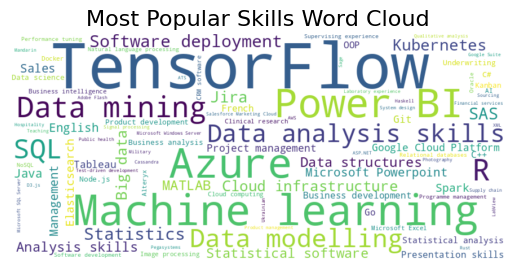

In [ ]:
# Create a word cloud of the skills
wordcloud = WordCloud(width=880, height=400, background_color='white').generate_from_frequencies(skill_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels

plt.title('Most Popular Skills Word Cloud', fontsize=16)
plt.show()

In [ ]:
skills_columns = df_with_skills.iloc[:, df_with_skills.columns.get_loc('AI'):].sum().sort_values(ascending=False)

In [ ]:
top_10_skills = skills_columns.head(10)
top_10_skills

,0
TensorFlow,165
Machine learning,57
Azure,54
Power BI,50
R,26
Data mining,24
SQL,21
Data modelling,18
Data analysis skills,17
Software deployment,15


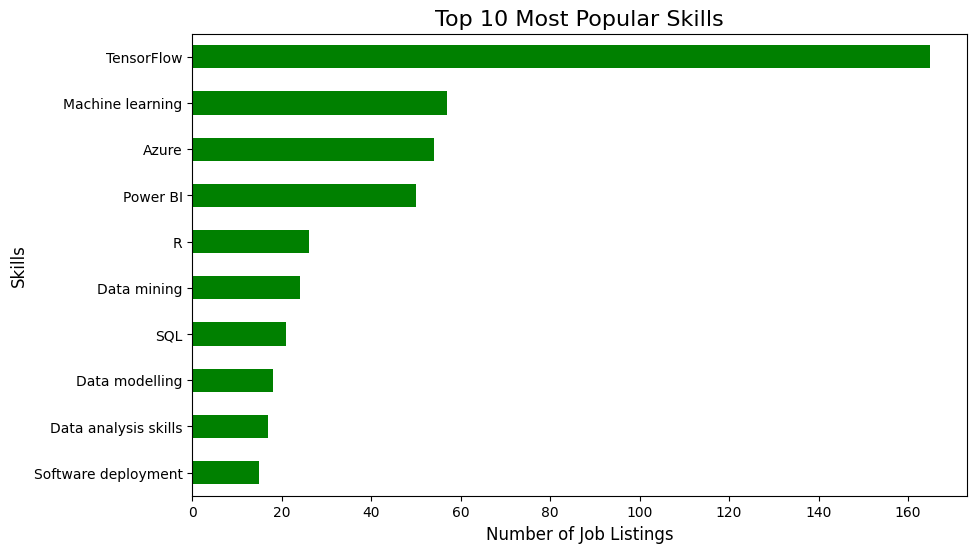

In [ ]:

# Create a horizontal bar chart of the top 10 skills required

top_10_skills = skills_columns.head(10)

plt.figure(figsize=(10, 6))
top_10_skills.plot(kind='barh', color='green')
plt.title('Top 10 Most Popular Skills', fontsize=16)
plt.xlabel('Number of Job Listings', fontsize=12)
plt.ylabel('Skills', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to display most popular skill at the top
plt.show()

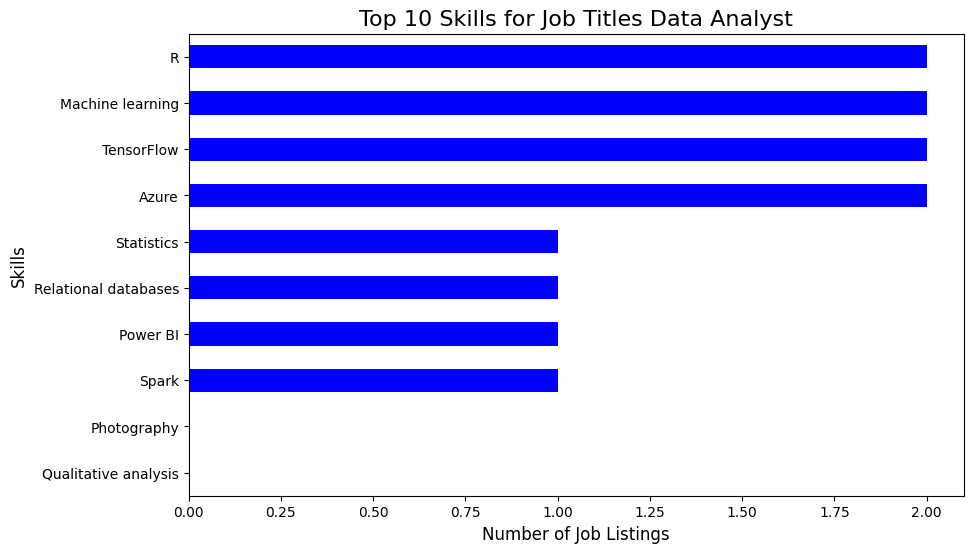

In [ ]:

da_jobs = df_with_skills[df_with_skills['Job Title'].str.contains('Data Analyst', case=False, na=False)]

da_skills = da_jobs.iloc[:, da_jobs.columns.get_loc('AI'):].sum().sort_values(ascending=False)

top_10_da_skills = da_skills.head(10)

plt.figure(figsize=(10, 6))
top_10_da_skills.plot(kind='barh', color="blue")

plt.title('Top 10 Skills for Job Titles Data Analyst', fontsize=16)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular skill at the top
plt.show()

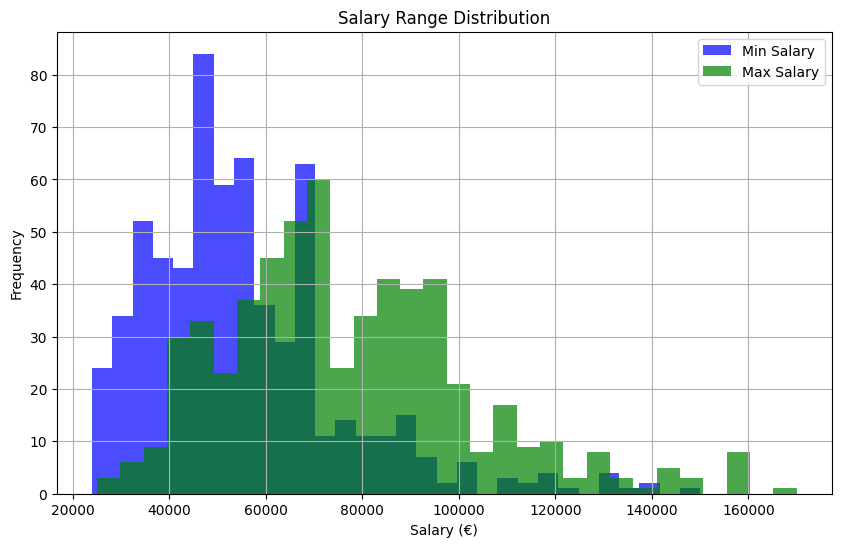

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(df['salary_min'], bins=30, label='Min Salary', alpha=0.7, color='blue')
plt.hist(df['salary_max'], bins=30, label='Max Salary', alpha=0.7, color='green')
plt.title('Salary Range Distribution')
plt.xlabel("Salary (€)")
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

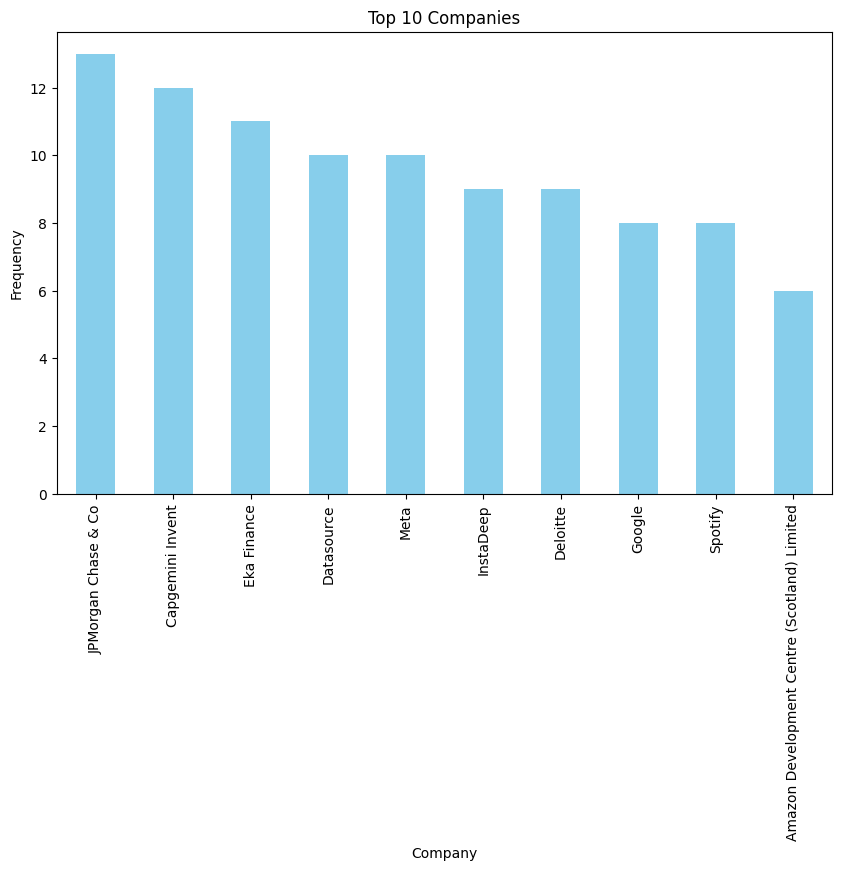

In [68]:
# Create a bar chart of the top 10 companies
top_companies = df['Company'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies')
plt.ylabel('Frequency')
plt.xlabel('Company')
plt.show()

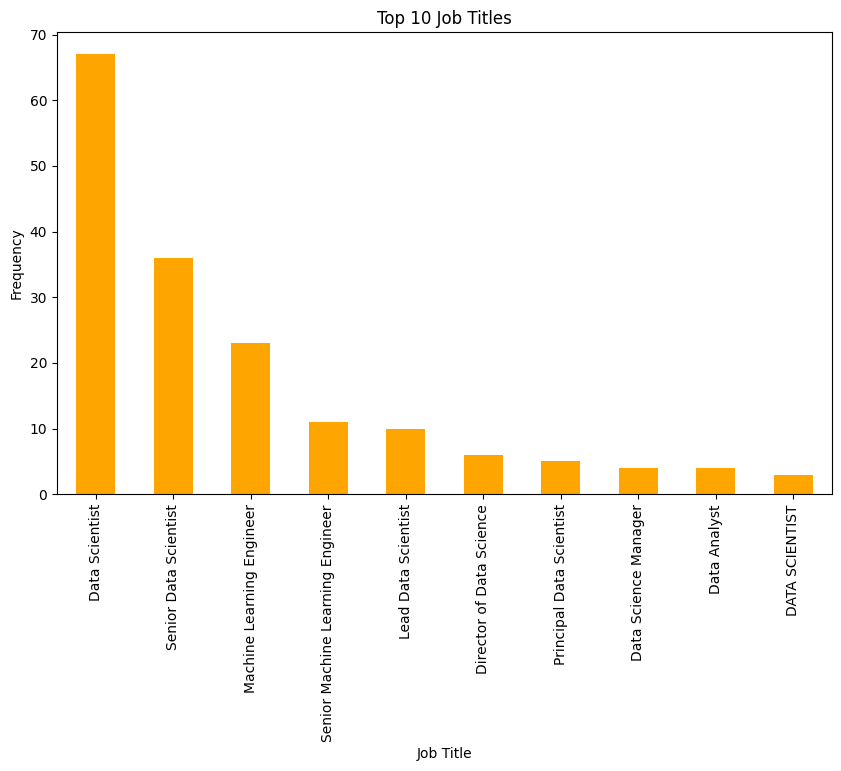

In [69]:
# Create a bar chart of the top 10 job titles
top_job_titles = df['Job Title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_job_titles.plot(kind='bar', color='orange')
plt.title('Top 10 Job Titles')
plt.ylabel('Frequency')
plt.xlabel('Job Title')
plt.show()

In [70]:
df['Job Title'] = df['Job Title'].str.replace('DATA SCIENTIST', 'Data Scientist', case=False)

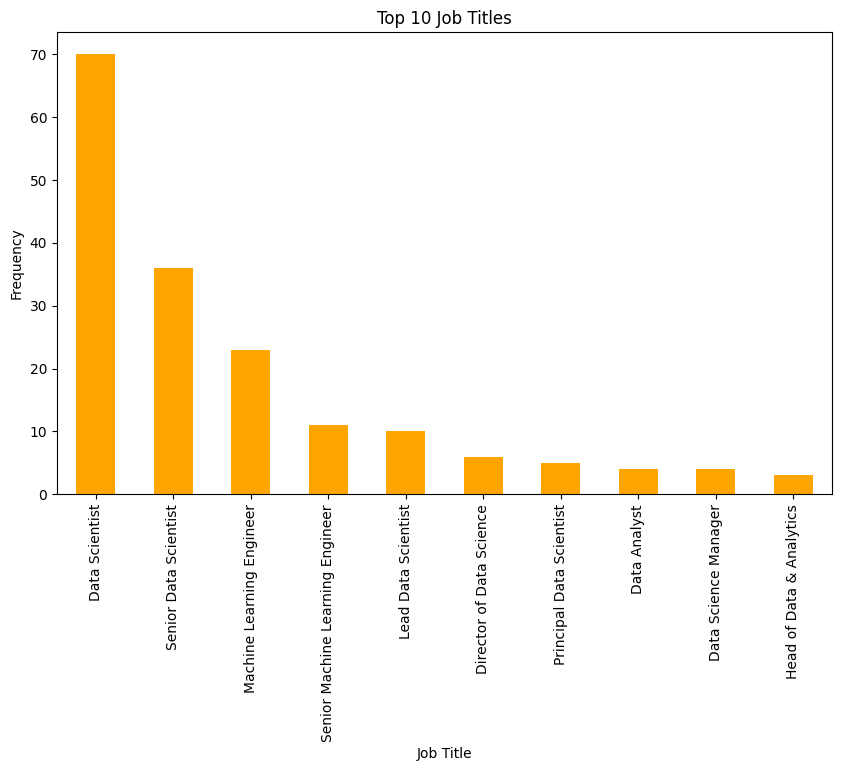

In [72]:
# Create a bar chart of the top 10 job titles
top_job_titles = df['Job Title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_job_titles.plot(kind='bar', color='orange')
plt.title('Top 10 Job Titles')
plt.ylabel('Frequency')
plt.xlabel('Job Title')
plt.show()